# Вторая часть Домашнего задания 2

Эта часть весит 100 баллов +20 бонусных баллов задачу 5

А все ДЗ2 весит 200 баллов +20 бонусных баллов


# Задача 1. Чиним гетероскедастичность (15 баллов)
Давайте поможем эконометристке Урсулле с оценкой параметра $\beta$ в модели $y_1=\beta x_1+\varepsilon_1$ в условиях гетероскедастичности
(и при выполнении прочих стандартных предпосылок классической модели линейной регрессии со стохастическими регрессорами)


1. Проверьте будет ли данная оценка $\beta_{8}$  состоятельна? (5 баллов)
$$
\widehat{\beta_8}=\frac{1}{n} \sum_{i=1}^n \frac{y_i}{x_i}
$$

2. При каком  функциональном виде условной дисперсии случайной ошибки модели $\sigma^2\left(x_i\right)$ данная оценка окажется эффективной? (5 баллов)

3. Будет ли оценка обобщенного MHK $\beta_{GLS}$ состоятельной? (5 баллов)
$$
\widehat{\beta_{GLS}}=\frac{\frac{1}{n} \sum_{i=1}^n \frac{x_i y_i}{\sigma^{2}\left(x_i\right)}}{\frac{1}{n} \sum_{i=1}^n \frac{x_i^2}{\sigma^2\left(x_i\right)}} .
$$



**Ваше решение:**


#Diamonds dataset(Датасет для задач 2, 3, 4, 5)

Датасет по бриллиантам

In [ ]:
import numpy as np
import pandas as pd

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [ ]:
import pandas as pd

In [ ]:
data_diamonds = pd.read_excel('https://raw.githubusercontent.com/limph0nimph/psmo_linreg_classes/main/Diamonds.xlsx',
              engine = 'openpyxl')
data_diamonds.head()

,Price,Carat Weight,Color,Clarity,Depth,Table,Cut,Table-Depth
0,1000,0.30,E,VVS1,60.0,59,Excellent,-1.0
1,1000,0.44,E,VS2,61.9,58,Excellent,-3.9
2,1000,0.31,E,VVS1,61.3,58,Excellent,-3.3
3,1000,0.66,K,SI1,62.8,57,Excellent,-5.8
4,1000,0.47,H,VS2,59.1,64,Very Good,4.9


# Задача 2: Что влияет на цену бриллиантов?(40 баллов)
(по 5 балла за каждое подзадание(всего 8 подзадач))

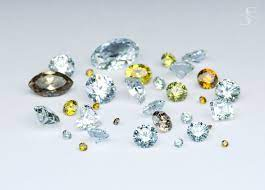

Посмотрим на категориальные переменные:

In [ ]:
data_diamonds.columns

Index(['Price', 'Carat Weight', 'Color', 'Clarity', 'Depth', 'Table', 'Cut',
       'Table-Depth'],
      dtype='object')

In [ ]:
data_diamonds['Color'].unique()

array(['E', 'K', 'H', 'G', 'D', 'F', 'I', 'J'], dtype=object)

In [ ]:
data_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2690 entries, 0 to 2689
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         2690 non-null   int64  
 1   Carat Weight  2690 non-null   float64
 2   Color         2690 non-null   object 
 3   Clarity       2690 non-null   object 
 4   Depth         2690 non-null   float64
 5   Table         2690 non-null   int64  
 6   Cut           2690 non-null   object 
 7   Table-Depth   2690 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 168.2+ KB


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


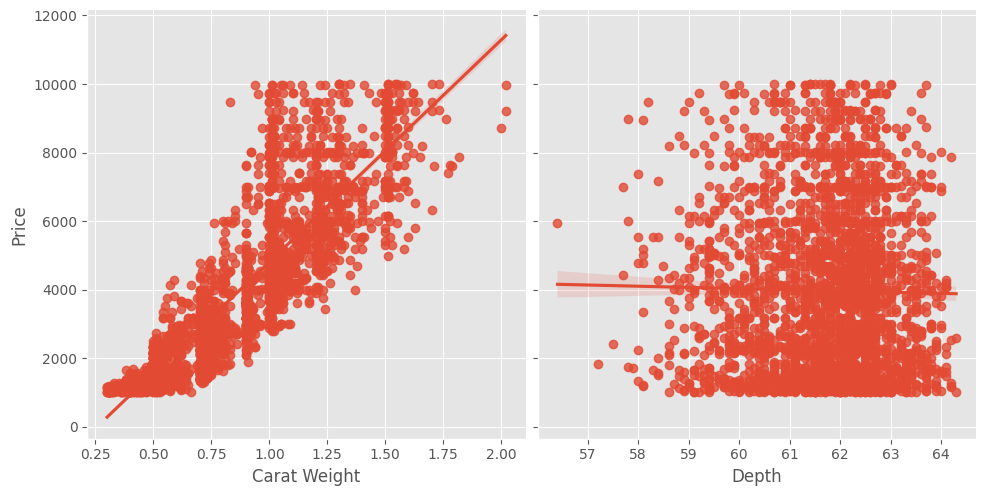

In [ ]:
sns.pairplot(
    data_diamonds,
    y_vars='Price',
    x_vars=['Carat Weight', 'Depth'],
    size=5,
    kind='reg',
    diag_kind=None
);

##Задание 2.1 (5 баллов за модель и интепретацию коэффициентов)
(Используйте statmodels)

Постройте линейную регрессию цены на вес карата:
Оцените параметры модели

$$
Price_i = \beta_0 + \beta_1 \cdot CaratWeight_i + \varepsilon_i
$$


In [ ]:
#your code here

Значимы ли коэффициенты?
Проинтерпретируйте модель?

**Ваш ответ:**

##Задание 2.2 (5 баллов за модель и интепретацию коэффициентов)

Что изменится, если добавим в модель глубину Depth  

$$
Price_i = \beta_0 + \beta_1 \cdot CaratWeight_i + \beta_2 \cdot Depth_i+ \varepsilon_i
$$





Значимы ли коэффициент при Depth?


**Ваш ответ:**

Также качество  переменнная Cut среза тоже кажется важным фактором влияющим на цену бриллианта.


In [ ]:
data_diamonds['Cut'].unique()

array(['Excellent', 'Very Good', 'Good', 'Ideal'], dtype=object)

In [ ]:
sns.catplot(data=data_diamonds, x="Cut", y="Price", kind="violin")


Это категориальная переменная  и ее стоит предобработать, чтобы вставить в линеную регрессию. Можно заметить, что качество можно упорядочить как ['Good':1, 'Very Good':2, 'Excellent':3,  'Ideal':4].
Для этого воспользуемся OrdinalEncoder.
##Задание 2.3 (5 баллов за преобразование)

Преобразуйте категориальную переменную Cut с помощью map и словаря.

In [ ]:
#your code here


 С помощью catplot посмотрим на зависимость распределения цены от Clarity (прозрачности кристалла). По идее этот фактор тоже оказывает влияние на цены бриллианта.
 Это категориальная переменная

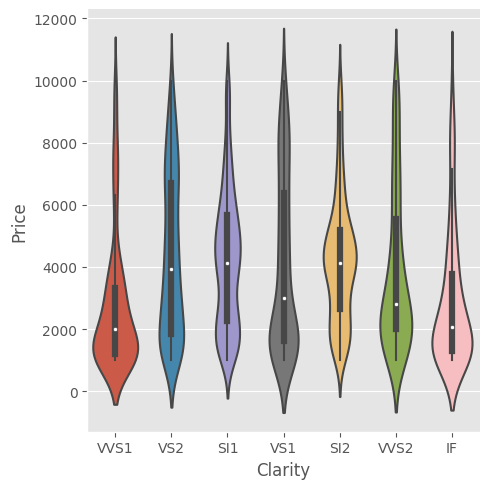

In [ ]:
sns.catplot(data=data_diamonds, x="Clarity", y="Price", kind= "violin")

In [ ]:
data_diamonds['Clarity'].unique()

array(['VVS1', 'VS2', 'SI1', 'VS1', 'SI2', 'VVS2', 'IF'], dtype=object)

In [ ]:
#your code here

##Задание 2.4 (5 баллов за расчет медианы и создание дамми переменной и добавлением в датасет)

Для каждой категории посчитайте медиану и разбейти категории на три группы: [ClarityGroup1 : meadian_price<= 2200, ClarityGroup2 : median_price around 3000 , ClarityGroup3 : meadian_price>= 3800]
Какие категории войдут в каждую группу?

Для каждой группы создайте дамми-переменную(индикатор принадлежности к группе).

$ClarityGroup1_i =1$, if clarity category belong to a group 1

Добавьте эти индикаторные переменные в датасет.

In [ ]:
#your code here

##Задание 2.5 (5 баллов за оценку модели и вывод)
Теперь оценим модель $$
Price_i = \beta_0 + \beta_1 \cdot CaratWeight_i + \beta_2 \cdot Depth_i+\beta_3 Cut_i + \beta_4 ClarityGroup1_i  + \beta_5 ClarityGroup2_i +\varepsilon_i
$$


In [ ]:
#your code here

Почему мы в модель не добавили переменную индикатор ClarityGroup3_i?
Что было бы плохо, если бы добавили?

##Задание 2.6 (5 баллов за подчет корреляции и вывод о мультиколлинеарности)

Посмотрим на скореллированость признаков? Есть ли тут проблемы с мультиколлинеарностью?

In [ ]:
#your code here

**Ваш ответ:**

##Задание 2.7 (5 баллов за добавление новых признаков в модели и интепретацию)
Известно, что эффект от дамми переменной может быть и через кросс-связь: Поэтому иногда в модель регрессии можно добавить такие
признаки $CaratWeight_i \cdot ClarityGroup1_i$ и $CaratWeight_i \cdot ClarityGroup2_i $.
Как можно проинтепретировать коэффициенты при этих признаках?

Ваш ответ:

Добавьте  в модель линейной регрессии эти признаки и оцените регрессию:
 $$
Price_i = \beta_0 + \beta_1 \cdot CaratWeight_i + \beta_2 \cdot Depth_i+\beta_3 Cut_i + \beta_4 ClarityGroup1_i+ \beta_5 ClarityGroup2_i +\beta_6 CaratWeight_i \cdot ClarityGroup1_i  +\beta_7 CaratWeight_i \cdot ClarityGroup2_i +\varepsilon_i
$$

In [ ]:
#your code here

Значимы ли коэффициенты $\beta_6$ и $\beta_7$?

##Задание 2.8 (5 баллов за F-test и выводы )
С помощью F-test проверьте ограничения:
\begin{cases}
\beta_6 = 0,\\
\beta_7 = 0\\
\end{cases}


Вы можете пользоваться  F-test из statmodels или своей реализацией F-test из первой части дз.

In [ ]:
# your code here

Сделайте, вывод о том, собираетесь ли вы включать  признаки $CaratWeight_i \cdot ClarityGroup1_i$ и $CaratWeight_i \cdot ClarityGroup2_i $ в модель.

Можно заметить что чем больше Carat Weight	тем больше разброс цены.

Теперь давайте проведем тест на наличие гетероскедастичности, что будем делать в задании 3.1 и задании 3.2

#Задача 3.1 Тест Гольфелда Кванта (20 баллов)

Описание алгоритма Голдфелда – Квандта:

- Упорядочиваем все наблюдения по модулю подозрительной переменной c точки зрения гетероскедастичности : suspicion_feature (Carat_Weight).
- Делим все наблюдения на три группы (если наблюдений достаточно много, то приблизительно на трети). Удобно, если в первой и третьей группах количество наблюдений одинаково.
- Наблюдениями средней группы пренебрегаем, а по первым $n_1$(первая треть выборки) и последним $n_2$(последняя треть выборки) наблюдениям **оцениваем отдельные регрессии**.
- Используя суммы квадратов остатков (RSS) в оцененных регрессиях, рассчитываем тестовую статистику по формуле в первой $RSS_1$ и $RSS_2$  третий группе
- Сравниваем полученное значение F – статистики с критическим (при выбранном уровне значимости critical_level).
- Если значение F – статистики превышает критическое, нулевая гипотеза о гомоскедастичности отвергается.

$F statistic(n_2 - k,n_1 - k) = \frac{RSS_2/(n_2 - k)}{RSS_1/(n_1 - k)}$
(one-sided alternative односторонняя альтернативная гипотеза, которая говорит о возрастании дисперсии с ростом Carat_Weight)


In [ ]:
import scipy
class LinearRegression():
  def __init__(self, regularize = 0):
    self.regularize = 0

  def fit(self, X, y):
    '''
    X vector of shape(n_observations, n_features)
    y vector of shape  (n_observations, 1)
    returns beta of shape n_features
    '''
    self.n_observations = X.shape[0]
    self.n_features =  X.shape[1]
    assert X.shape[0] == len(y)

    self.X = X
    self.y = y
    beta  = np.linalg.inv(X.T@X)@X.T@y

    self.beta = beta

    return beta

  def RSS(self, X, y):
    return np.sum((y - X@self.beta)**2)

  def predict(self, X):
    return X@self.beta

  def GoldfeildQuant_test(self, suspicion_feature_ind, critical_level =0.05 ):

    """Computes the White_test test to test null hypothesis if residuals are homoscedastic.

    Parameters
    ----------
    suspicion_feature_ind: int  index of a feature column in self.X according to which we sort
    critical_level: float  уровень значимости


    Returns
    -------
    test_statistic: тестовую статистику  $F_st$


    p_value: float
      the probability calculated  using ficher distribution
    is_homoscedastic: bool
        whether F_st>F_critical then reject H_0 so, is_homoscedastic=0
        if F_st > F_critical then fail to  reject H_0 so, is_homoscedastic=1

    """
    # your code here
    pass


Еще раз оценим модель   $$
Price_i = \beta_0 + \beta_1 \cdot CaratWeight_i + \beta_2 \cdot Depth_i+\beta_3 Cut_i +\varepsilon_i
$$

In [ ]:
X_data = sm.add_constant(data_diamonds[['Carat Weight','Depth','Cut']])
linreg = LinearRegression()
linreg.fit(X = X_data.values, y = data_diamonds['Price'] )

Теперь примените вашу имплементацию теста

In [ ]:
#your code here

Сделайте вывод о наличие гетероскедастичности ? Вопрос: какого типа гетероскедастичность проверяет данный тест?

**Ваш ответ:**

# Задача 3.2 Тест Вайта (20 баллов)

 $H_0$ : гомоскедастичность

$H_1$  : гетероскедастичность

Вид гетероскедастичности не конкретизируется.

Привлекательной чертой теста Уайта является его
универсальность. Однако этот тест не является конструктивным.
Если гетероскедастичность выявлена, то тест Уайта не дает
указания на функциональную форму гетероскедастичности.
Единственным способом коррекции является применение
стандартных ошибок в форме Уайта

Описание теста:
*  Оценивается регрессия по всем наблюдениям.
*  Сохраняются остатки регрессии $\hat{ɛ_i}$
*  Потом оценивается регрессия квадратов остатков на все регрессоры(признаки),
их квадраты, попарные произведения и константу.

*  В последней оцененной регрессии находим коэффициент
множественной детерминации $R^2$
*  Вычисляем тестовую статистику по формуле $nR^2$
*  Тестовая статистика имеет распределение $χ^{2}$ «хи – квадрат» с $k-1$ степенями свободы, где $k$ – число оцениваемых коэффициентов.
*  Сравниваем полученное значение тестовой статистики с
критическим при выбранном уровне значимости. Если значение
тестовой статистики превышает критическое, то нулевая
гипотеза о гомоскедастичности отвергается.

In [ ]:
import scipy
class LinearRegression():
  def __init__(self, regularize = 0):
    self.regularize = 0

  def fit(self, X, y):
    '''
    X vector of shape(n_observations, n_features)
    y vector of shape  (n_observations, 1)
    returns beta of shape n_features
    '''
    self.n_observations = X.shape[0]
    self.n_features =  X.shape[1]
    assert X.shape[0] == len(y)

    self.X = X
    self.y = y
    beta  = np.linalg.inv(X.T@X)@X.T@y

    self.beta = beta

    return beta

  def RSS(self, X, y):
    return np.sum((y - X@self.beta)**2)

  def predict(self, X):
    return X@self.beta

  def White_test(self, critical_level = 0.05, constant_included = True):
    """Computes the White_test test to test null hypothesis if residuals are homoscedastic.

    Parameters
    ----------
    critical_level: float
    constant_included: bool
        if constant_included==True then it means that self.X[0] is vector of ones
          else then it means tha tconstant is not included in a original regression


    Returns
    -------
    test_statistic: тестовую статистику по формуле $nR^2$


    p_value: float
    the probability calculated  using xi squared distribution

    is_homoscedastic: bool
      whether p-value> critica_value then reject H_0 so, is_homoscedastic=0
      if p-value<= critica_value then fail to  reject H_0 so, is_homoscedastic=1

    """
    # your code here
    pass


In [ ]:
linreg = LinearRegression()
linreg.fit(X = X_data.values, y = data_diamonds['Price'] )

Используем эту имплементацию для проверки гомоскедастичности для модели $$Price_i = \beta_0 + \beta_1 \cdot CaratWeight_i + \beta_2 \cdot Depth_i+\beta_3 Cut_i +\varepsilon_i
$$

In [ ]:
#your code here

#Задача 4 Предложите процедуру корректировки гетероскедастичности и реализуйте её(5 баллов):
Какой из тестов вам помог понять вид гетероскедастичности?

In [ ]:
#your code here

#Bonus: Задача 5 Тест Колмогорова-Смирнова для проверки нормальности остатков (20 баллов)


Эмпирическая функция распределения для остатоков
$$
F_{\mathrm{n}}(x)=\frac{\text { number of (elements in the sample } \leq x)}{n}=\frac{1}{n} \sum_{i=1}^n 1_{(-\infty, x)}\left(X_i\right),
$$
где $1_{(-\infty, x)}\left(X_i\right)$ функция индикатора равного единицы ели  $X_i \leq x$ и равен 0 в остальных случаях.
Статистика Колмогорова-Смирнова для функции распрделения (cumulative distribution function) $F(x)$ это
$$
D_n=\sup _x\left|F_n(x)-F(x)\right|
$$
Чтобы посчитать эмпирическая функцию распределения может помочь сортировка массива
F(x) -это cdf нормального распределения в это случае

Для расчета p-value используйте kstwo.sf(test_statistic, N)

Имплементируйте тест  тест Колмогорова-Смирнова для проверки нормальности остатков(**НЕ используя** scipy.stats.kstest, ks_1samp, ks_2samp)

In [ ]:
from scipy.stats import kstwo

In [ ]:
def ks_normal(residuals):
  """Computes the Kolmogorov-Smirnov test to test null hypothesis if residuals follow normal ditribution.
    It checks two-sided alternative

  Parameters
  ----------
  residuals: array_like

  Returns
  -------
  test_statistic: float
    Статистика Колмогорова-Смирнова

  p_value: float
    the probability calculated  using  distributions.kstwo.sf(test_statistic, N)
    where N = len(residuals)

  """
  # your code here
  pass

Давайте  оценим модель $$
Price_i = \beta_0 + \beta_1 \cdot CaratWeight_i + \beta_2 \cdot Depth_i+\beta_3 Cut_i+ɛ_i$$  и посчитаем остатки
$\hat{ɛ_i} =Price_i - \hat{\beta_0} - \hat{\beta_1} \cdot CaratWeight_i - \hat{\beta_2} \cdot Depth_i- \hat{\beta_3}Cut_i$

Теперь с помощью ks_normal(residuals)  проверим нормальности остатков

Проверьте совпадает ли  ваша имплементацию  p-value с kstest(residuals, scipy.stats.norm.cdf) )

In [ ]:
#your code here